#### Implementing Simple ChatBot Using LangGraph
- Start -> SuperBot -> End


In [17]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

In [18]:
## Reducers
from typing import Annotated # which is Human Message and AI Message -> use list to store
from langgraph.graph.message import add_messages # add_messages is a reducer

In [19]:
class State(TypedDict) :
    messages : Annotated[list, add_messages]
    

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

claudeAPI = os.getenv("claudeAPI")
groqAPI = os.getenv("groqAPI")


from langchain_anthropic import ChatAnthropic

claude = ChatAnthropic(
    model = "claude-haiku-4-5-20251001",
    temperature = 0.7,
    api_key = claudeAPI
)

In [ ]:
from langchain_groq import ChatGroq
groq = ChatGroq(
    model = "qwen/qwen3-32b",
    api_key = groqAPI
)

#### We will start Creating Nodes

In [21]:
def superbot (state : State) :
    return {"messages" : [groq.invoke(state['messages'])]}
    # Cause of reducer, it's getting appended to messages

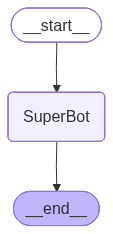

In [23]:
graph = StateGraph(State)
graph.add_node("SuperBot", superbot)
graph.add_edge(START, "SuperBot")
graph_builder= graph.compile()


## Display 
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))


#### Execution of this Graph

In [25]:
graph_builder.invoke({'messages' : 'Hi, I am working on LangGraph Applications'})

{'messages': [HumanMessage(content='Hi, I am working on LangGraph Applications', additional_kwargs={}, response_metadata={}, id='9cf9848b-302a-4041-a39b-ec279bc006cf'),
  AIMessage(content="<think>\nOkay, the user mentioned they're working on LangGraph applications. First, I should recall what LangGraph is. LangGraph is a framework for building stateful, real-time, and chat-based applications using LangChain. The user might be looking for guidance on specific aspects of LangGraph, such as how to set up a project, implement certain features, or troubleshoot issues.\n\nI need to ask the user for more details to understand their specific needs. For example, are they new to LangGraph and need an overview? Or are they facing a particular problem? It's best to ask specific questions to narrow down the scope of the assistance. I should also consider common challenges users might encounter, like integrating with Large Language Models (LLMs), managing state, handling real-time processing, or de

#### StreamMode
1) values() - Human Message
2) updates() - AI Message

In [27]:
for event in graph_builder.stream({"messages" : "Learning AgenticAI"}, stream_mode = "updates"):
    print(event)


{'SuperBot': {'messages': [AIMessage(content='<think>\nOkay, the user mentioned "Learning AgenticAI", which might be a term they\'re referring to, possibly related to AI agents. First, I need to confirm if there\'s a specific product or framework named AgenticAI. If not, it could be a general inquiry about AI agents. Next, I should consider the user\'s background. They might be beginners or have some knowledge, so the explanation should be clear and concise. The user likely wants to understand the basics of AI agents, including their components, applications, and maybe how to get started. I should structure the answer into key points like definition, core components, learning approach, application scenarios, and practical steps. Also, mention tools or resources they can use. Need to check for any typos or misunderstandings, like if AgenticAI is a specific framework. Since I don\'t find specific info on "AgenticAI", proceed with a general explanation of AI agents. Make sure to highlight

In [28]:
for event in graph_builder.stream({"messages" : "Learning AgenticAI"}, stream_mode = "values"):
    print(event)


{'messages': [HumanMessage(content='Learning AgenticAI', additional_kwargs={}, response_metadata={}, id='253ea76a-dea6-461f-aca3-e7a0f99c268b')]}
{'messages': [HumanMessage(content='Learning AgenticAI', additional_kwargs={}, response_metadata={}, id='253ea76a-dea6-461f-aca3-e7a0f99c268b'), AIMessage(content='<think>\nOkay, the user mentioned wanting to learn about AgenticAI. First, I need to clarify what AgenticAI refers to. I think it might be a type of artificial intelligence where the system has certain autonomy, similar to an agent (agent), capable of making decisions or taking actions independently. Alternatively, it could be a specific company or product, but the user didn\'t specify further, so I should focus on the general concept.\n\nGiven that the user is a beginner, they might not be familiar with related concepts like AI agents or autonomous systems. I need to start with the basics, explain what AI agents are, their characteristics, and how they differ from traditional AI s